In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
#import matplotlib.image as mpimg
from PIL import Image  

import numpy as np

from skimage import data
#from skimage.morphology import disk
from skimage import filters 
from skimage.filters import median

from scipy import ndimage


## Filtrage moyenneur

Un filtre moyenneur de dimension M x N est formé de 1. la valeur des pixels de la convolution de l'image par le noau est normalisée en la divisant par M x N.
* Utiliser la fonction `ndimage.convolve` pour effectuer un filtrage moyenneur de l’image cameraman.
* Utiliser respectivement des noyaux de dimension 3x3, 5x5 et 7x7
* Comparer les résultats et interpréter l’effet du filtre moyenneur


In [2]:
a=data.camera()

In [3]:
k = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

In [4]:
img1=ndimage.convolve(a, k, mode='constant', cval=0.0)

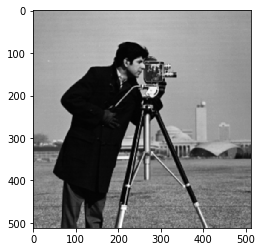

In [5]:
plt.imshow(img1,cmap='gray')
plt.show()

In [6]:
k2= np.array([[1/25, 1/25, 1/25,1/25,1/25],     
               [1/25, 1/25, 1/25,1/25,1/25],
              [1/25, 1/25, 1/25,1/25,1/25],
             [1/25, 1/25, 1/25,1/25,1/25],
              [1/25, 1/25, 1/25,1/25,1/25]])   #filtre moyenneur (on divise 1/taille de mat exp:3*3=9)

In [7]:
img2=ndimage.convolve(a, k2, mode='constant', cval=0.0)

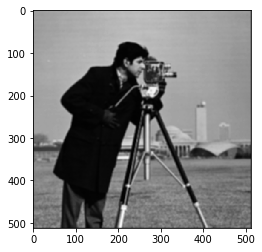

In [8]:
plt.imshow(img2,cmap='gray')
plt.show()

In [9]:
k3 = np.array([7*[1/49,1/49,1/49,1/49,1/49,1/49,1/49]])#filtre 7*7

In [10]:
img3=ndimage.convolve(a, k3, mode='constant', cval=0.0)

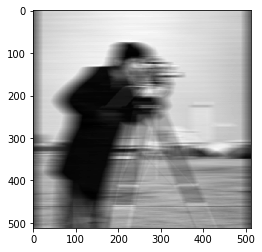

In [11]:
plt.imshow(img3,cmap='gray')
plt.show()

In [12]:
np.array([7*[1/49,1/49,1/49,1/49,1/49,1/49,1/49]])

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816, 0.02040816, 0.02040816]])

## Filtrage médian

Le filtre médian de dimension MxN remplace chaque pixel de l’image par la valeur médiane
du voisinage MxN centré sur ce même pixel. Utiliser la fonction `median` pour effectuer ce filtrage.

* Appliquer un filtre médian de 3x3 et de 7x7.
* Comparer et interpréter l’effet du filtre médian

Utiliser la fonction `np.random.randint(salt_value, size=(M, N))` pour ajouter un bruit impulsionnel à la matrice de l’image cameramen, avec `salt_value = 50`.

* Appliquer un filtre moyenneur de 3x3 sur l’image bruitée.
* Comparer les résultats du filtre moyenneur et du filtre médian.


In [13]:
x=median(a,k)

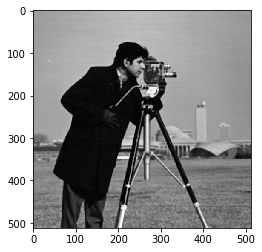

In [14]:

plt.imshow(x,cmap='gray')
plt.show()

In [15]:

y=median(a,k3)

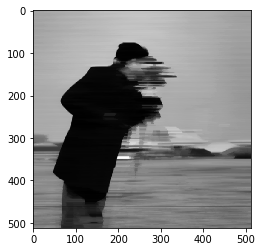

In [16]:

plt.imshow(y,cmap='gray')
plt.show()

In [17]:
noise=np.random.randint(50, size=(512, 512))

In [18]:
zz=median(a,k3)


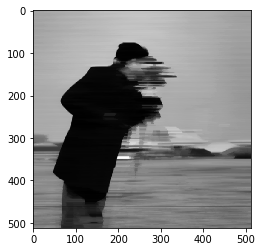

In [19]:
plt.imshow(zz,cmap='gray') #without noise
plt.show()

In [20]:
new=a+noise

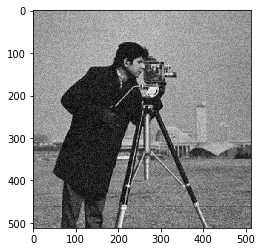

In [21]:
plt.imshow(new,cmap='gray') #with noise
plt.show()

## Filtrage gaussian
Le filtrae gaussian peut etre effectué en utilisant la commande `filters.gaussian`
* Appliquer un filtre gaussian à l'image cameraman pour sigma = 1, sigma = 3 et sigma = 5.
* Comparer et interpréter l’effet du filtre gaussian

In [22]:
fg1=filters.gaussian(a,1)

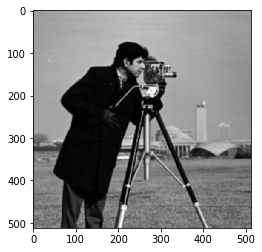

In [23]:
plt.imshow(fg1,cmap='gray') 
plt.show()

In [24]:
fg2=filters.gaussian(a,3)

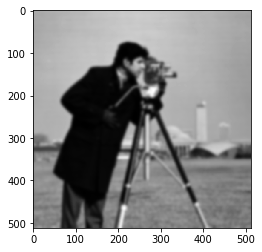

In [25]:
plt.imshow(fg2,cmap='gray') 
plt.show()

In [26]:
fg3=filters.gaussian(a,5)

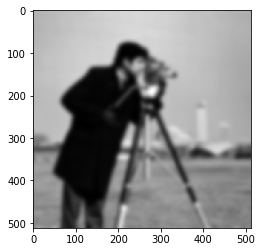

In [27]:
plt.imshow(fg3,cmap='gray') 
plt.show()

In [28]:
#le FILTRE gaussien a un effet de floue, si sigma augmente  l'effet du floue augmente

## Filtrage passe-haut

* Filtrer l'image cameraman par un filtre passe-haut ayant comme noyau:

\begin{array}{ccc} 
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & - 1 \end{array} 

* Appelons le résultat IPH
* Filtrer la même image par un filtre passe-bas (moyenne 3x3). Appelons le résultat IPB
* Comparer les images IPH et (originale - IPB)
* Pour A=1.1, 1.2 et 1.5, comparer IPH avec l’image IHB calculée de la manière suivante:

IHB = (A-1)(originale)+ IPH


In [29]:
IP=np.array([[-1/9,-1/9,-1/9],[-1/9,8/9,-1/9],[-1/9,-1/9,-1/9]])

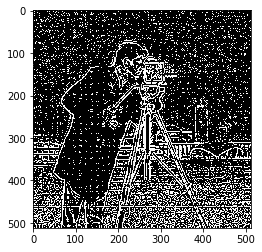

In [30]:
IPH=ndimage.convolve(a,IP)
plt.imshow(IPH,cmap='gray')
plt.show()

In [31]:
IPB=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

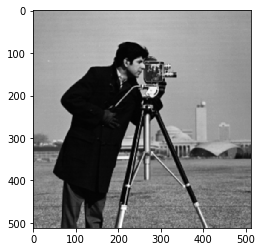

In [32]:
ip2=ndimage.convolve(a,IPB)
plt.imshow(ip2,cmap='gray')
plt.show()

In [33]:
uu =a-ip2

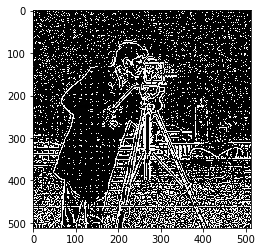

In [34]:
plt.imshow(uu,cmap='gray')
plt.show()#originale-IPB


In [35]:
IHB = 0.1 * a+IPH


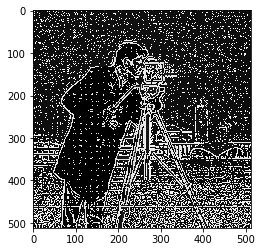

In [36]:
plt.imshow(IHB,cmap='gray')
plt.show()

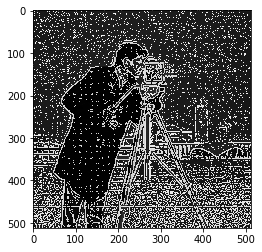

In [37]:
IHB2 = 0.2 * a+IPH
plt.imshow(IHB2,cmap='gray')
plt.show()


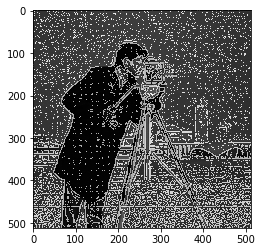

In [38]:
IHB2 = 0.5 * a+IPH      #le contraste a diminué
plt.imshow(IHB2,cmap='gray')
plt.show()

In [39]:
#Created By Mohamed Yassine Ferjani 